In [1]:
using GridPotentialFlow
using Plots
using LinearAlgebra

┌ Info: Precompiling GridPotentialFlow [1f0d46c9-1630-4f7c-9a63-ed825740f08c]
└ @ Base loading.jl:1260


#### Grid

In [2]:
Δx = 0.01
Lx = 2
xlim = (-Lx/2,Lx/2)
ylim = (-Lx/2,Lx/2)
g = PhysicalGrid(xlim,ylim,Δx);

#### Circles

In [3]:
R = 0.5
centercircle = Circle(R,Δx)

leftcircle = Circle(0.5*R,Δx)
T = RigidTransform((-Lx/4,0.0),0.0)
T(leftcircle)

rightcircle = Circle(0.5*R,Δx)
T = RigidTransform((Lx/4,0.0),0.0)
T(rightcircle)

Circular body with 157 points and radius 0.25
   Current position: (0.5,0.0)
   Current angle (rad): 0.0


#### Flat plate

In [4]:
c = 1.0
plate = Plate(c,Δx)
T = RigidTransform((0.0,0.0),-π/6)
T(plate);

#### Vortices

In [5]:
v1 = Vortex(0.75,0.0,1.0);
v2 = Vortex(-0.75,0.0,1.0);
v3 = Vortex(plate.x[1]+3e-2*plate.len*cos(plate.α+π/2),plate.y[1]+3e-2*plate.len*sin(plate.α+π/2),1.0);
v4 = Vortex(plate.x[end]+3e-2*plate.len*cos(plate.α+π/2),plate.y[end]+3e-2*plate.len*sin(plate.α+π/2),1.0);

### 1) Steady unregularized flow around a body

In [6]:
model = VortexModel(g,bodies=centercircle)
ψ = computeψ(model,Ub=(0.0,0.0),U∞=(1.0,1.0),Γb=5.0);

MethodError: MethodError: Cannot `convert` an object of type Array{Float64,2} to an object of type ScalarData{314,Float64,Array{Float64,1}}
Closest candidates are:
  convert(::Type{T}, !Matched::T) where T<:AbstractArray at abstractarray.jl:14
  convert(::Type{T}, !Matched::Factorization) where T<:AbstractArray at /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.4/LinearAlgebra/src/factorization.jl:55
  convert(::Type{T}, !Matched::T) where T at essentials.jl:171

In [7]:
xg,yg = coordinates(ψ,g);
plot(centercircle,fillcolor=:black,fillrange=0,fillalpha=0.25,linecolor=:black,linewidth=2)
plot!(xg,yg,ψ,linecolor=:black,levels=36,size=[400,400])

UndefVarError: UndefVarError: ψ not defined

### 2) Steady unregularized flow around a multiple bodies

In [8]:
model = VortexModel(g,bodies=[leftcircle,rightcircle])
ψ = computeψ(model,U∞=(0.0,0.0),Ub=[(1.0,0.0),(0.0,0.0)]);

MethodError: MethodError: Cannot `convert` an object of type Array{Float64,2} to an object of type ScalarData{314,Float64,Array{Float64,1}}
Closest candidates are:
  convert(::Type{T}, !Matched::T) where T<:AbstractArray at abstractarray.jl:14
  convert(::Type{T}, !Matched::Factorization) where T<:AbstractArray at /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.4/LinearAlgebra/src/factorization.jl:55
  convert(::Type{T}, !Matched::T) where T at essentials.jl:171

In [9]:
xg,yg = coordinates(ψ,g);
plot(xg,yg,ψ,linecolor=:black,levels=36,size=[400,400])
plot!(leftcircle,fillcolor=:black,fillrange=0,fillalpha=0.25,linecolor=:black,linewidth=2)
plot!(rightcircle,fillcolor=:black,fillrange=0,fillalpha=0.25,linecolor=:black,linewidth=2)

UndefVarError: UndefVarError: ψ not defined

### 3) Steady regularized flow around a body

In [10]:
model = VortexModel(g,bodies=plate,edges=[length(plate)])
ψ = computeψ(model,U∞=(1.0,0.0));

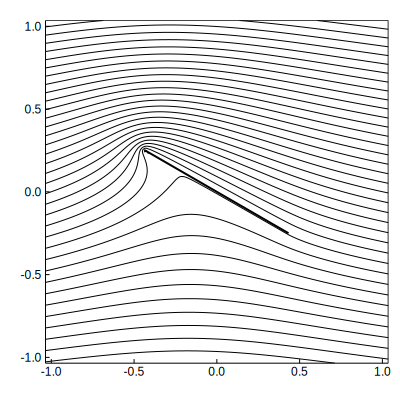

In [11]:
xg,yg = coordinates(ψ,g);
plot(plate,fillcolor=:black,fillrange=0,fillalpha=0.25,linecolor=:black,linewidth=2)
plot!(xg,yg,ψ,linecolor=:black,levels=36,size=[400,400])

### 4) Unsteady flow without a body

In [12]:
model = VortexModel(g,vortices=[v1,v2])
ψ = computeψ(model,U∞=(1.0,1.0));

MethodError: MethodError: Cannot `convert` an object of type Array{Float64,2} to an object of type ScalarData{0,Float64,Array{Float64,1}}
Closest candidates are:
  convert(::Type{T}, !Matched::T) where T<:AbstractArray at abstractarray.jl:14
  convert(::Type{T}, !Matched::Factorization) where T<:AbstractArray at /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.4/LinearAlgebra/src/factorization.jl:55
  convert(::Type{T}, !Matched::T) where T at essentials.jl:171

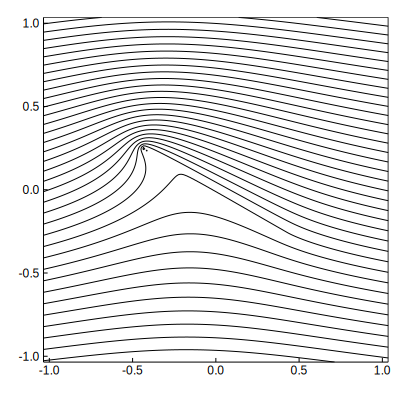

In [13]:
xg,yg = coordinates(ψ,g);
plot(xg,yg,ψ,linecolor=:black,levels=36,size=[400,400])

### 5) Unsteady unregularized flow around a body

In [14]:
model = VortexModel(g,vortices=[v1,v2],bodies=centercircle)
ψ = computeψ(model,U∞=(1.0,1.0));

MethodError: MethodError: Cannot `convert` an object of type Array{Float64,2} to an object of type ScalarData{314,Float64,Array{Float64,1}}
Closest candidates are:
  convert(::Type{T}, !Matched::T) where T<:AbstractArray at abstractarray.jl:14
  convert(::Type{T}, !Matched::Factorization) where T<:AbstractArray at /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.4/LinearAlgebra/src/factorization.jl:55
  convert(::Type{T}, !Matched::T) where T at essentials.jl:171

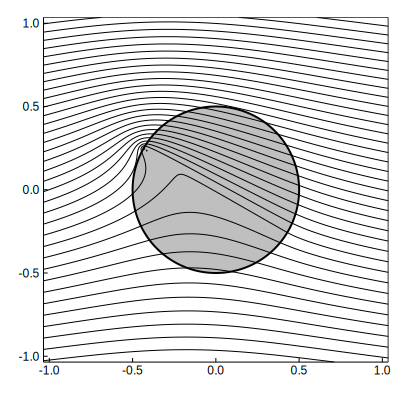

In [15]:
xg,yg = coordinates(ψ,g);
plot(centercircle,fillcolor=:black,fillrange=0,fillalpha=0.25,linecolor=:black,linewidth=2)
plot!(xg,yg,ψ,linecolor=:black,levels=36,size=[400,400])

### 6) Unsteady regularized flow around a body

In [16]:
model = VortexModel(g,vortices=[v3,v4],bodies=plate,edges=[1,length(plate)]);
ψ = computeψ(model,U∞=(1.0,0.0),σ=[(0,0),(0,0)]);

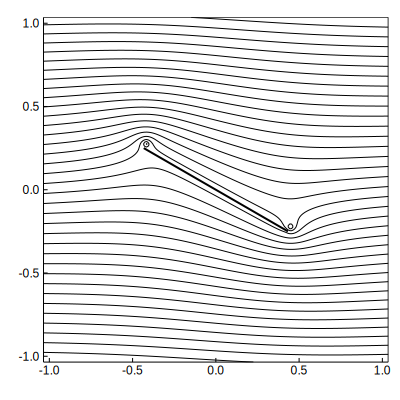

In [17]:
xg,yg = coordinates(ψ,g);
plot(plate,fillcolor=:black,fillrange=0,fillalpha=0.25,linecolor=:black,linewidth=2)
plot!(xg,yg,ψ,linecolor=:black,levels=36,size=[400,400])